In [1]:
import os
import numpy as np
import itertools
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df15 = pd.read_csv("../../Dataset/16-02-2018(Time).csv", low_memory = False)
df15 = df15.drop([0,1])
df15['Timestamp']= pd.to_datetime(df15['Timestamp'])
df15 = df15.sort_values(by=['Timestamp'])
df15 = df15.drop(columns = ['Timestamp'])

In [3]:
df15

,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Pkt Len Min,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
91661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,56300000,101.1162697,56300000,56300000
91660,0,0,0,0,0,0,0,0,1,0,...,8,32,0,0,0,0,0,0,0,0
91663,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,56300000,17.67766953,56300000,56300000
91691,0,0,0,0,300,0,0,0,0,0,...,0,8,0,0,0,0,0,0,0,0
91665,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,56300000,58.68986284,56300000,56300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,56300000,82.02438662,56300000,56300000
91656,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,56300000,26.1629509,56300000,56300000
91659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,56300000,28.28427125,56300000,56300000
91657,0,0,0,0,0,0,0,0,1,0,...,4,32,989739,0,989739,989739,9172344,0,9172344,9172344


In [4]:
df16Aux = pd.read_csv("../../Dataset/15-02-2018(Time).csv", low_memory = False)
df16Aux = df16Aux.drop([0,1])
df16Aux['Timestamp']= pd.to_datetime(df16Aux['Timestamp'])
df16Aux = df16Aux.sort_values(by=['Timestamp'])
df16Aux = df16Aux.drop(columns = ['Timestamp'])

In [5]:
listOrd = df15.columns.tolist()
df16 = pd.DataFrame()
for colu in listOrd:
    df16[colu] = df16Aux[colu]

In [6]:
df16Aux = None

In [7]:
df16

,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Pkt Len Min,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
305204,0,0,0,0,0.0,0,0,0,1,0,...,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
625011,0,0,0,0,0.0,0,0,0,1,0,...,4.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
747969,0,0,0,0,0.0,0,0,0,1,0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
728998,0,0,0,0,0.0,0,0,0,0,1,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
728997,0,0,0,0,0.0,0,0,0,1,0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364710,1,0,0,0,0.0,0,1,0,0,1,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
364711,0,0,0,0,0.0,0,0,0,0,1,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
778527,0,0,0,0,0.0,0,0,0,0,1,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
929269,0,0,0,0,0.0,0,0,0,1,0,...,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
input_label15 = np.array(df15.loc[:, df15.columns != "Label"]).astype(np.float)
output_label15 = np.array(df15["Label"])
out = []
for o in output_label15:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_label15= out

In [9]:
input_label16 = np.array(df16.loc[:, df16.columns != "Label"]).astype(np.float)
output_label16 = np.array(df16["Label"])
out = []
for o in output_label16:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_label16 = out

In [10]:
dfAE = pd.concat([df15, df16])
input_labelAE = np.array(dfAE.loc[:, dfAE.columns != "Label"]).astype(np.float)
output_labelAE = np.array(dfAE["Label"])
out = []
for o in output_labelAE:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_labelAE = out

In [11]:
dfAE = None
df15 = None
df16 = None
out = None

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(input_labelAE)
input_label15 = scaler.transform(input_label15)
input_label16 = scaler.transform(input_label16)
input_labelAE = scaler.transform(input_labelAE)

## AutoEncoder

In [13]:
input_labelAE, output_labelAE = shuffle(input_labelAE, output_labelAE)

In [14]:
inp_train,inp_test,out_train,out_test = train_test_split(input_labelAE, input_labelAE, test_size=0.2)

In [15]:
input_model = keras.layers.Input(shape = (78,))
enc = keras.layers.Dense(units = 64, activation = "relu", use_bias = True)(input_model)
enc = keras.layers.Dense(units = 36, activation = "relu", use_bias = True)(enc)
enc = keras.layers.Dense(units = 18, activation = "relu")(enc)
dec = keras.layers.Dense(units = 36, activation = "relu", use_bias = True)(enc)
dec = keras.layers.Dense(units = 64, activation = "relu", use_bias = True)(dec)
dec = keras.layers.Dense(units = 78, activation = "relu", use_bias = True)(dec)
auto_encoder = keras.Model(input_model, dec)

In [16]:
encoder = keras.Model(input_model, enc)
decoder_input = keras.layers.Input(shape = (18,))
decoder_layer = auto_encoder.layers[-3](decoder_input)
decoder_layer = auto_encoder.layers[-2](decoder_layer)
decoder_layer = auto_encoder.layers[-1](decoder_layer)
decoder = keras.Model(decoder_input, decoder_layer)

In [17]:
auto_encoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00025), loss = "mean_squared_error", metrics = ['accuracy'])

In [18]:
train = auto_encoder.fit(x = np.array(inp_train), y = np.array(out_train),validation_split= 0.1, epochs = 10, verbose = 1, shuffle = True)

Epoch 1/10
47006/47006 [==============================] - 49s 1ms/step - loss: 0.0022 - accuracy: 0.9132 - val_loss: 0.0016 - val_accuracy: 0.9506
Epoch 2/10
47006/47006 [==============================] - 51s 1ms/step - loss: 0.0016 - accuracy: 0.9329 - val_loss: 0.0016 - val_accuracy: 0.9610
Epoch 3/10
47006/47006 [==============================] - 48s 1ms/step - loss: 0.0016 - accuracy: 0.9336 - val_loss: 0.0015 - val_accuracy: 0.9242
Epoch 4/10
47006/47006 [==============================] - 48s 1ms/step - loss: 0.0016 - accuracy: 0.9353 - val_loss: 0.0015 - val_accuracy: 0.9469
Epoch 5/10
47006/47006 [==============================] - 54s 1ms/step - loss: 0.0015 - accuracy: 0.9351 - val_loss: 0.0015 - val_accuracy: 0.9376
Epoch 6/10
47006/47006 [==============================] - 55s 1ms/step - loss: 0.0015 - accuracy: 0.9350 - val_loss: 0.0015 - val_accuracy: 0.9473
Epoch 7/10
47006/47006 [==============================] - 51s 1ms/step - loss: 0.0015 - accuracy: 0.9358 - val_loss: 0

In [19]:
predict = auto_encoder.predict(inp_test)
losses = keras.losses.mean_squared_error(out_test, predict).numpy()
total = 0
for loss in losses:
    total += loss
print(total / len(losses))

0.0008861477607119608


In [20]:
inp_train = None
inp_test = None
out_train = None
out_test = None
input_labelAE = None

In [21]:
input_label15 = encoder.predict(input_label15)
input_label16 = encoder.predict(input_label16)

In [22]:
tamanhoSequencia = 10

In [23]:
inp = []
out = []
num = 0
for i in range(len(input_label15) - tamanhoSequencia + 1):
    aux = []
    for j in range(i, i + tamanhoSequencia):
        aux.append(input_label15[j])
    inp.append(aux)
    out.append(output_label15[i + tamanhoSequencia - 1])
input_label15 = inp
output_label15 = out

In [24]:
inp = []
out = []
num = 0
for i in range(len(input_label16) - tamanhoSequencia + 1):
    aux = []
    for j in range(i, i + tamanhoSequencia):
        aux.append(input_label16[j])
    inp.append(aux)
    out.append(output_label16[i + tamanhoSequencia - 1])
input_label16 = inp
output_label16 = out

In [25]:
inp = None
out = None

## Classificador

In [26]:
model = keras.Sequential([
    keras.layers.LSTM(units = 16, input_shape = ((tamanhoSequencia,18)), return_sequences = True, use_bias = True),
    keras.layers.LSTM(units = 8, return_sequences = False, use_bias = True),
    keras.layers.Dense(units = 2, activation = "softmax")
])
model.compile(optimizer= keras.optimizers.Adam(lr= 0.00025), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [27]:
model.fit(x = np.array(input_label15), y = np.array(output_label15), validation_split= 0.1, epochs = 10, verbose = 1)

Epoch 1/10
29491/29491 [==============================] - 188s 6ms/step - loss: 0.1350 - accuracy: 0.9450 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 2/10
29491/29491 [==============================] - 172s 6ms/step - loss: 2.2823e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 0.9997
Epoch 3/10
29491/29491 [==============================] - 173s 6ms/step - loss: 1.9915e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 0.9998
Epoch 4/10
29491/29491 [==============================] - 173s 6ms/step - loss: 7.5358e-05 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 0.9998
Epoch 5/10
29491/29491 [==============================] - 172s 6ms/step - loss: 7.2095e-05 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 0.9998
Epoch 6/10
29491/29491 [==============================] - 172s 6ms/step - loss: 5.6383e-05 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 0.9998
Epoch 7/10
29491/29491 [==============================] - 173s 6ms/step - loss: 5.5883e-05 -

In [28]:
input_label15 = None
output_label15 = None

In [29]:
resu = model.predict(np.array(input_label16))

In [30]:
res = [np.argmax(r) for r in resu]

In [31]:
cm = confusion_matrix(y_true = np.array(output_label16).reshape(len(output_label16)), y_pred = np.array(res))

In [32]:
def plot_confusion_matrix(cm, classes, normaliza = False, title = "Confusion matrix", cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normaliza:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[901064  86977]
 [ 19896  32602]]


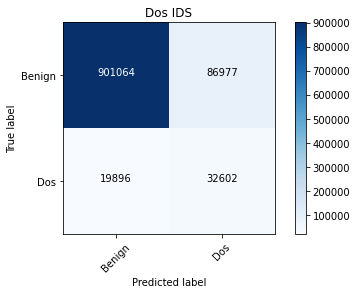

In [33]:
labels = ["Benign", "Dos"]
plot_confusion_matrix(cm = cm, classes = labels, title = "Dos IDS")

In [34]:
output_label16 = np.array(output_label16).reshape(len(output_label16))
res = np.array(res)
fpr, tpr, _ = roc_curve(output_label16,  res)
auc = roc_auc_score(output_label16, res)

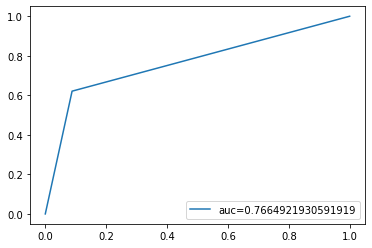

In [35]:
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)
plt.show()